<a href="https://colab.research.google.com/github/Avneet-0001/Thesis-research-project/blob/master/Double_fear_model_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import signal

## Final epidemic size heatmap with respect to p and $p_{fdv}$

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta
beta_fv = 1.6*beta
p_val = np.linspace(0,1,100)
p_fdv_val = np.linspace(0,1,100)
sigma = 0.2 #0.02
alpha_f = 1.2*beta
gamma_f = 0.05
gamma = beta/2


Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,1000,500, retstep=True) #t, dt = np.linspace(0,700,1000, retstep=True)

In [ ]:
def model(Ic,t,p,p_fdv):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv) + gamma_f*s_fdv + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt # gamma_f*s_fdv
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt #gamma_f*s_fdv
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt beta*i*s_fv
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt gamma_f*a_vac
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt gamma_f*a_vac
  dv = 0

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel

Text(0, 0.5, '$p_{fdv}$')

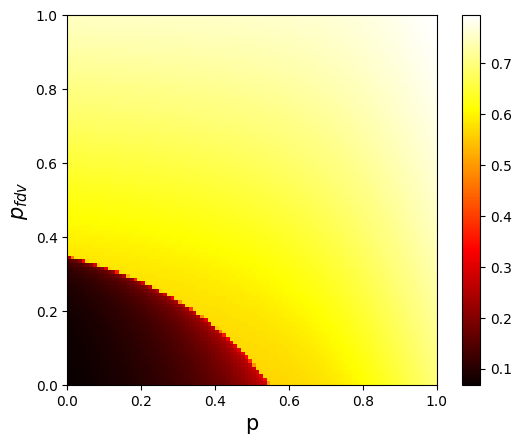

In [ ]:
final_size = []

for l in range(len(p_fdv_val)):
  p_fdv = p_fdv_val[l]
  total_infected_list = []
  for k in range(len(p_val)):
    p = p_val[k]
    z = odeint(model, Ic, t, args=(p,p_fdv,))
    i_input = (beta*z[:,0]+p*beta*z[:,1]+beta*z[:,2]+p_fdv*beta*z[:,3])*z[:,4]*dt #Rate at which population enters Infectious compartment
    total_infected = sum(i_input)
    total_infected_list.append(total_infected)
  final_size.append(total_infected_list)

fig, ax = plt.subplots()
im = ax.imshow(final_size, cmap='hot', extent=[0,1,0,1], origin='lower')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
# ax.set_xticks(np.arange(len(p_val)))
# ax.set_yticks(np.arange(len(p_fdv_val)))
# ax.set_xticklabels(['{:.1f}'.format(rate) for rate in p_val])
# ax.set_yticklabels(['{:.1f}'.format(rate) for rate in p_fdv_val])
ax.set_xlabel('p', fontsize='15')
ax.set_ylabel('$p_{fdv}$', fontsize='15')
#ax.set_title('Final epidemic size')
# data = np.asarray(final_size)
# ax = sb.heatmap(data)
#ax.invert_yaxis()

# Final epidemic size scatter plots with respect to $\beta_{\rm{fv}}$ and $\alpha_{\rm{f}}$

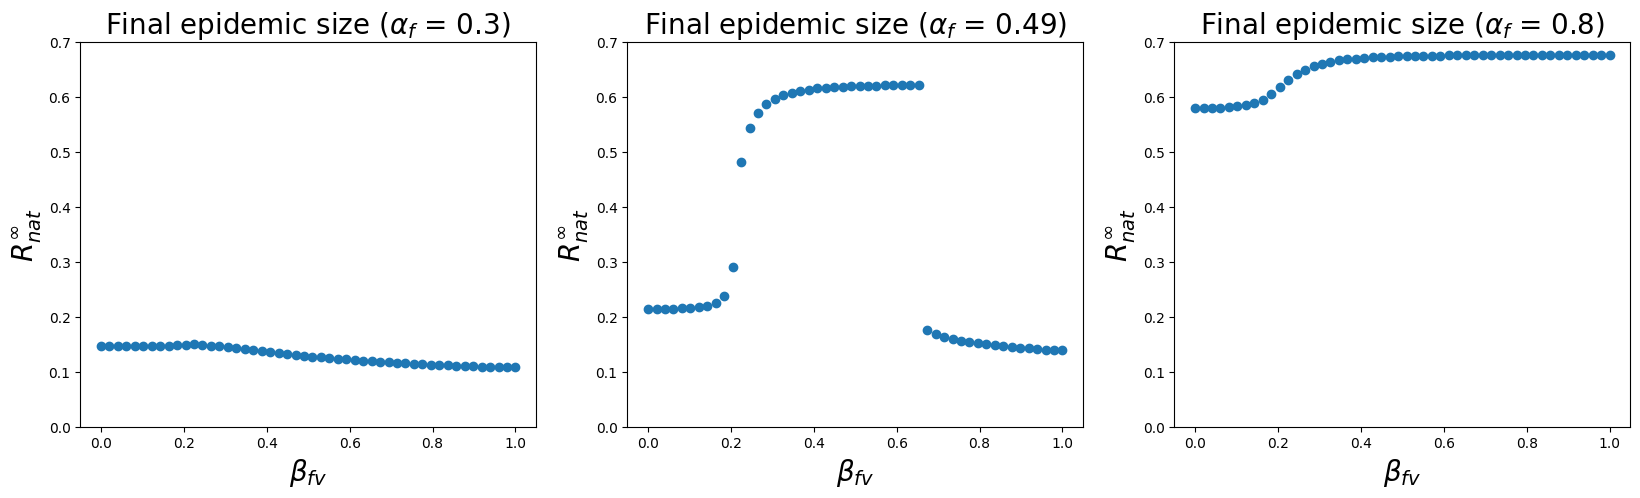

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta #0.9*beta
beta_fv_val = np.linspace(0,1,50)#[0.2*beta,0.4*beta,0.6*beta,0.8*beta,1.0*beta,1.2*beta,1.4*beta,1.6*beta,1.8*beta,2.0*beta]
alpha_f_val = np.array([0.3, 0.49, 0.8])#np.array([1.8*beta, 1.85*beta, 1.9*beta, 0.55, 1.95*beta, 2*beta, 2.05*beta, 2.1*beta, 2.15*beta, 2.2*beta, 2.4*beta, 2.6*beta]) #2*beta
gamma_f = 0.05 #0.07
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2
epsilon = 0.2
gamma = beta/2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
# t_end = 50000
# t, dt = np.linspace(0,100000,110000, retstep=True) #t, dt = np.linspace(0,10000,500, retstep=True)
t_end = 3000
t_pts = 6000
t, dt = np.linspace(0,t_end,t_pts, retstep=True)


fig,axis = plt.subplots(1,3, figsize=(20,5))
plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

def model(Ic,t,beta_fv):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv) + gamma_f*s_fdv + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt # gamma_f*s_fdv
  dS_fd = -p*beta*i*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (gamma_f + alpha_f*r_nat)*s_fd  - v_t*s_fd - beta_fv*(s_fv + a_vac + s_fdv)*s_fd + alpha_f*r_vac*s_fdv  #dS_fd/dt
  dS_fv = -beta*i*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - (gamma_f + alpha_f*r_vac)*s_fv - beta_fd*(s_fd + i + s_fdv)*s_fv + alpha_f*r_nat*s_fdv #dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + beta_fv*(s_fv + a_vac + s_fdv)*s_fd + beta_fd*(s_fd + i + s_fdv)*s_fv - alpha_f*(r_vac*s_fdv + r_nat*s_fdv) - gamma_f*s_fdv #dS_fdv/dt #gamma_f*s_fdv
  dI = beta*i*s + p*beta*i*s_fd + beta*i*s_fv - (gamma)*i + p_fdv*beta*i*s_fdv  #dI/dt beta*i*s_fv
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt gamma_f*a_vac
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt gamma_f*a_vac
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t # 0

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel

for k in range(len(alpha_f_val)):
  alpha_f = alpha_f_val[k]
  final_s = []
  final_s_fd = []
  final_s_fv = []
  final_s_fdv = []
  final_i = []
  final_r_nat = []
  final_r_vac = []
  final_a_vac = []
  total = []

  for l in range(len(beta_fv_val)):
    beta_fv = beta_fv_val[l]
    z = odeint(model, Ic, t, args=(beta_fv_val[l],))
    final_s.append(z[t_pts-1,0])
    final_s_fd.append(z[t_pts-1,1])
    final_s_fv.append(z[t_pts-1,2])
    final_s_fdv.append(z[t_pts-1,3])
    final_i.append(z[t_pts-1,4])
    final_r_nat.append(z[t_pts-1,5])
    final_r_vac.append(z[t_pts-1,6])
    final_a_vac.append(z[t_pts-1,7])
    total.append(z[t_pts-1,0]+z[t_pts-1,1]+z[t_pts-1,2]+z[t_pts-1,3]+z[t_pts-1,4]+z[t_pts-1,5]+z[t_pts-1,6]+z[t_pts-1,7])

  #axis[k].plot(beta_fv_val, final_s, label='S')
  #ax = axis[k].twinx()
  #ax.plot(beta_fv_val, final_s_fd, label='S_{fd}', color='red')
  #axis[k].plot(beta_fv_val, final_s_fv, label='S_{fv}')
  #axis[k].plot(beta_fv_val, final_s_fdv, label='S_{fdv}')
  #axis[k].plot(beta_fv_val, final_i, '.', label='I')
  axis[k].plot(beta_fv_val, final_r_nat, 'o', label='R_{nat}')
  #axis[k].plot(beta_fv_val, final_r_vac, label='R_{vac}')
  #axis[k].plot(beta_fv_val, final_a_vac, label='A_{vac}')
  #axis[k].plot(beta_fv_val, total, label='Total population')
  axis[k].set_xlabel('$β_{fv}$', fontsize='20')
  axis[k].set_ylabel('$R_{nat}^{\infty}$', fontsize='20')
  axis[k].set_ylim(0,0.7)
  #ax.set_ylabel('Fraction in S_{fd}')
  #ax.legend()
  axis[k].set_title(f'Final epidemic size ($α_f$ = {round(alpha_f, 3)})', fontsize='20')
  #if (k==1):
    #axis[k].legend(loc=(1.04,0.1))

# Final epidemic size heatmap with respect to $\beta_{\rm{fv}}$ and $\alpha_{\rm{f}}$

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
sigma = 0.2 #0.02
eta = 0.8
epsilon = 0.2

beta_fv_val = np.linspace(0,1,100)
alpha_f_val = np.linspace(0,1,100)

gamma = beta/2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,3000,6000, retstep=True) #t, dt = np.linspace(0,700,1000, retstep=True)

In [ ]:
def model(Ic,t,beta_fv,alpha_f):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv) + gamma_f*s_fdv + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt # gamma_f*s_fdv
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt #gamma_f*s_fdv
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt beta*i*s_fv
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt gamma_f*a_vac
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt gamma_f*a_vac
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t # 0

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel

Text(0, 0.5, '$\\beta_{fv}$')

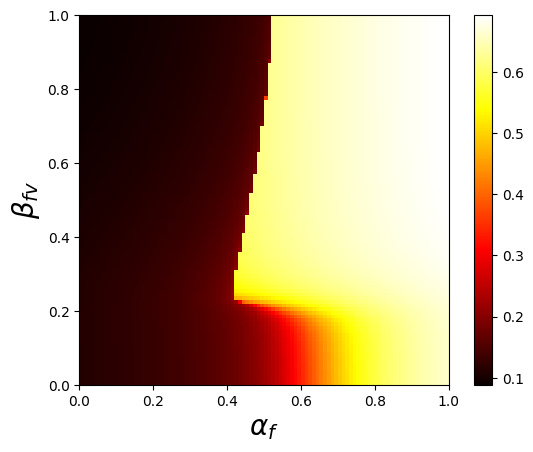

In [ ]:
final_size = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  total_infected_list = []
  for k in range(len(alpha_f_val)):
    alpha_f = alpha_f_val[k]
    z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
    i_input = (beta*z[:,0]+p*beta*z[:,1]+beta*z[:,2]+p_fdv*beta*z[:,3])*z[:,4]*dt #Rate at which population enters Infectious compartment
    total_infected = sum(i_input)
    total_infected_list.append(total_infected)
  final_size.append(total_infected_list)

fig, ax = plt.subplots()
im = ax.imshow(final_size, cmap='hot', extent=[0,1,0,1], origin='lower')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
# ax.set_xticks(np.arange(len(p_val)))
# ax.set_yticks(np.arange(len(p_fdv_val)))
# ax.set_xticklabels(['{:.1f}'.format(rate) for rate in p_val])
# ax.set_yticklabels(['{:.1f}'.format(rate) for rate in p_fdv_val])
ax.set_xlabel(r'$\alpha_f$', fontsize='20')
ax.set_ylabel(r'$\beta_{fv}$', fontsize='20')
#ax.set_title('Final size heatmap', fontsize='15')

# data = np.asarray(final_size)
# ax = sb.heatmap(data)
#ax.invert_yaxis()

# Temporal plots


##Region A - Black Maroon region ($0<\alpha_f<0.4$) | ($\alpha_f = 0.3$, $\beta_{fv} = 0.3$)

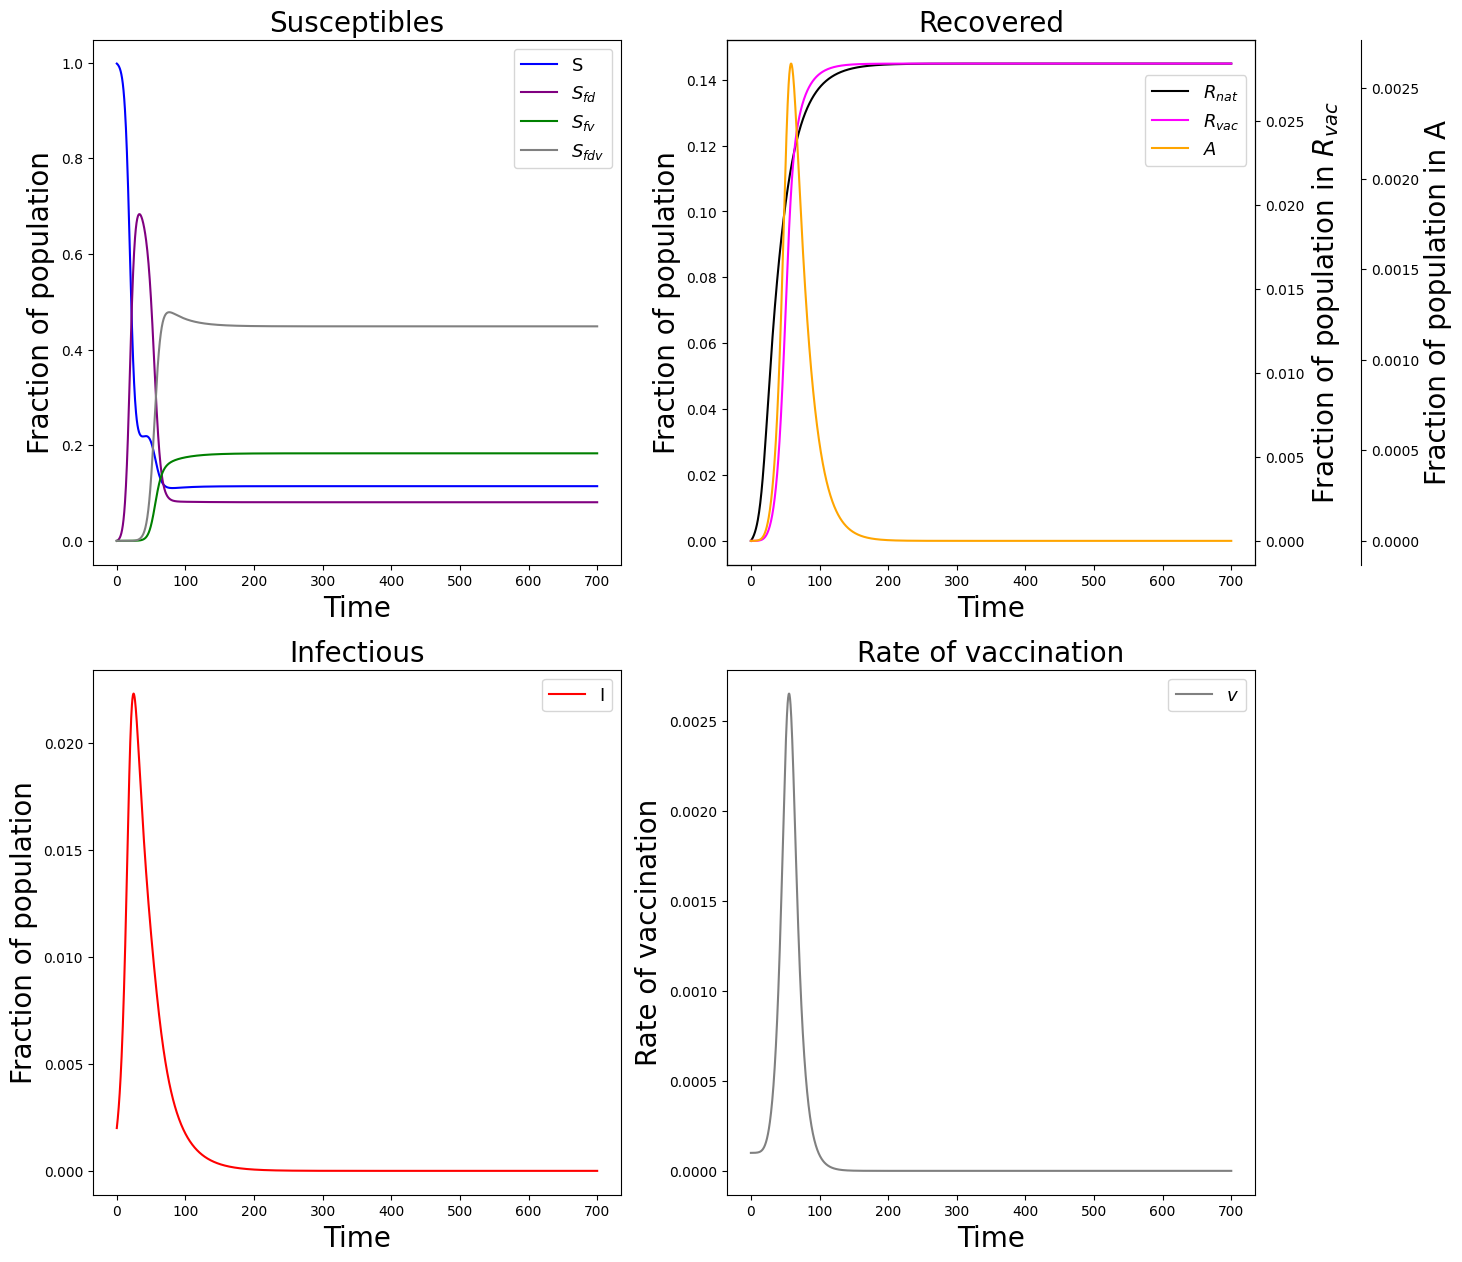

In [ ]:
#Parameters
alpha_f = 0.3 #1.8*beta

beta_fv = 0.3 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))


ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))

axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


## Region B - Maroon region ($0.4<\alpha_f<0.5$) | ($\alpha_f=0.45$, $\beta_{fv} = 0.1$)

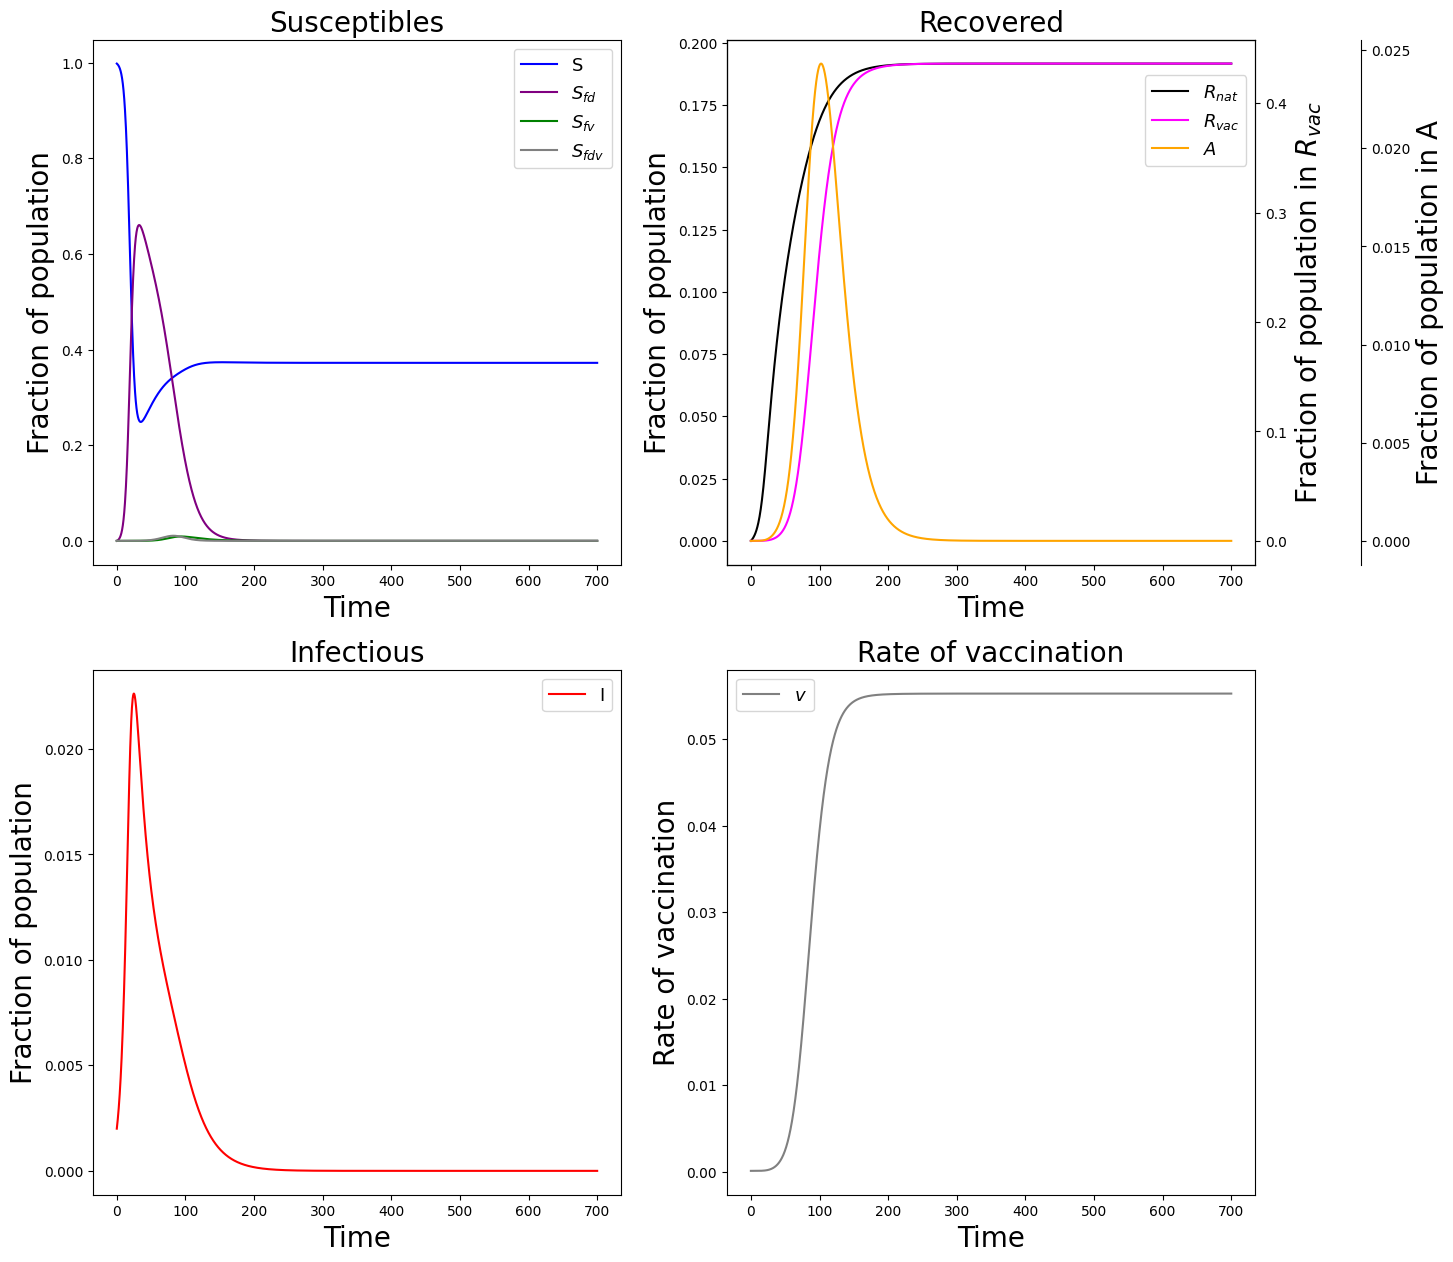

In [ ]:
#Parameters
alpha_f = 0.45 #1.8*beta

beta_fv = 0.1 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))

ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))


axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


## Region C - Red region ($0.5<\alpha_f<0.62$) | ($\alpha_f=0.59$, $\beta_{fv}=0.1$)

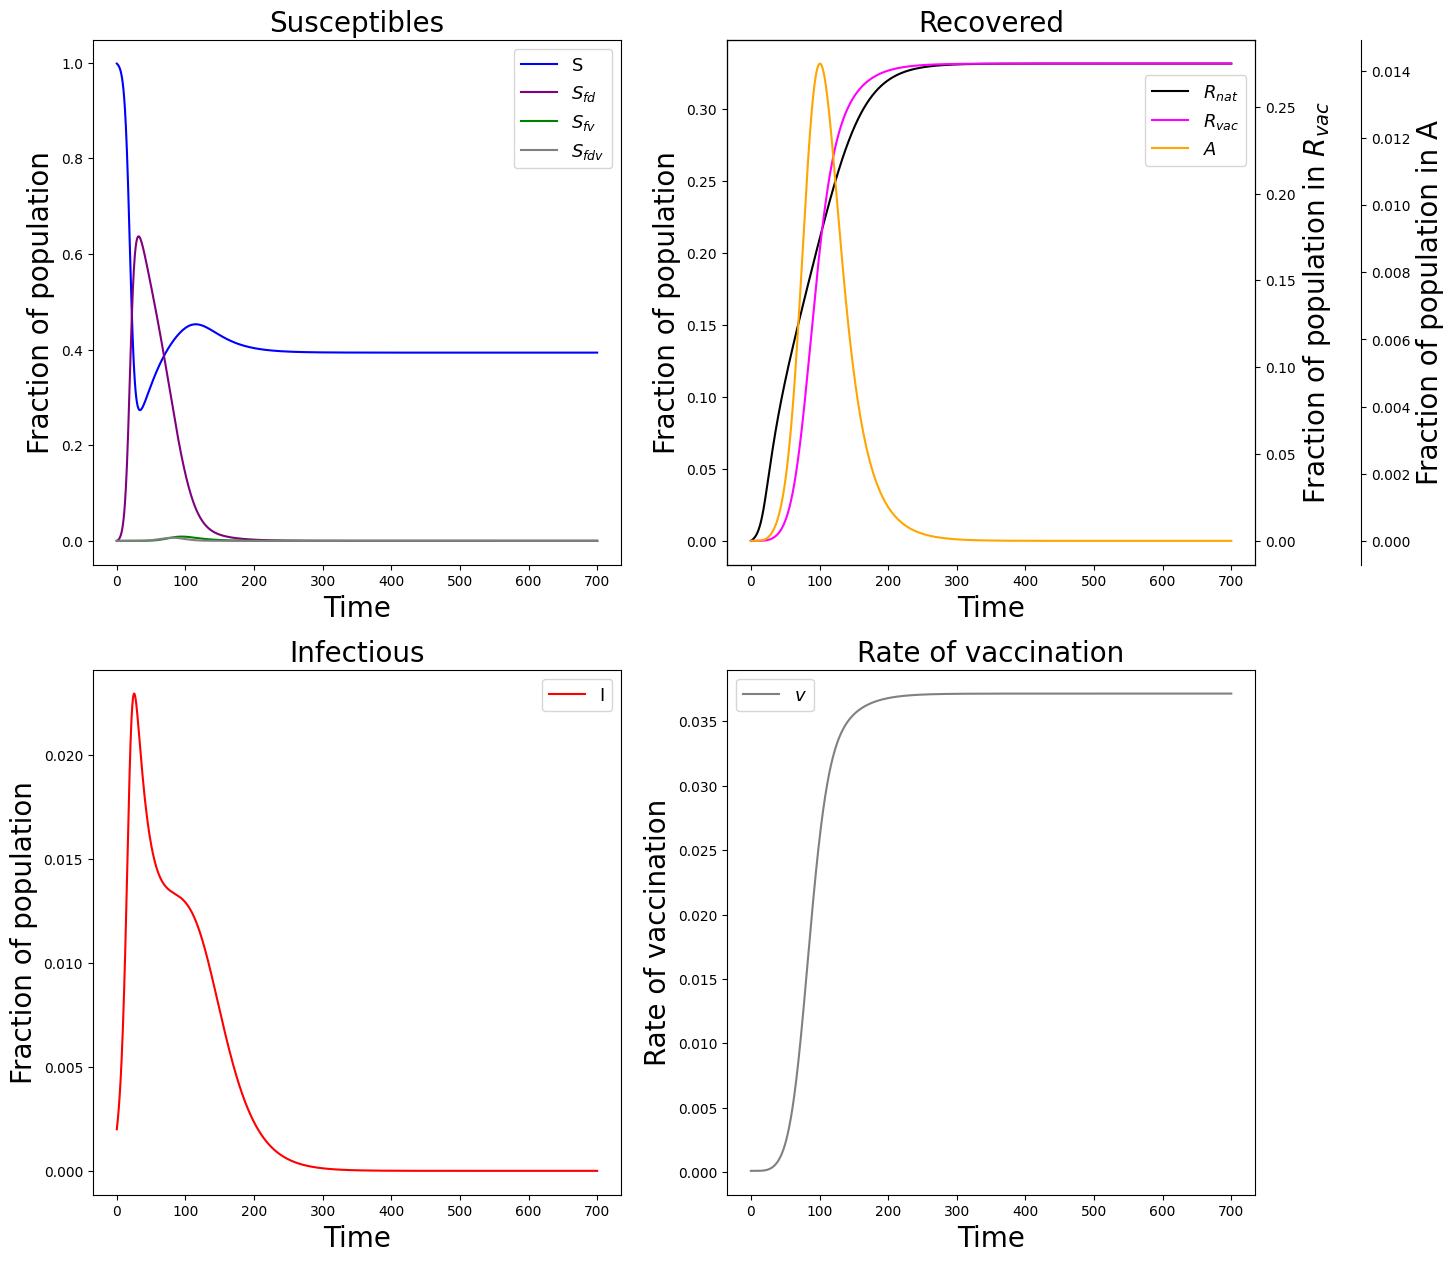

In [ ]:
#Parameters
alpha_f = 0.59 #1.8*beta

beta_fv = 0.1 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))


ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))

axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


## Region D - Bright yellow region ($0.5<\alpha_f<0.62$) | ($\alpha_f=0.5$, $\beta_{fv}=0.3$)

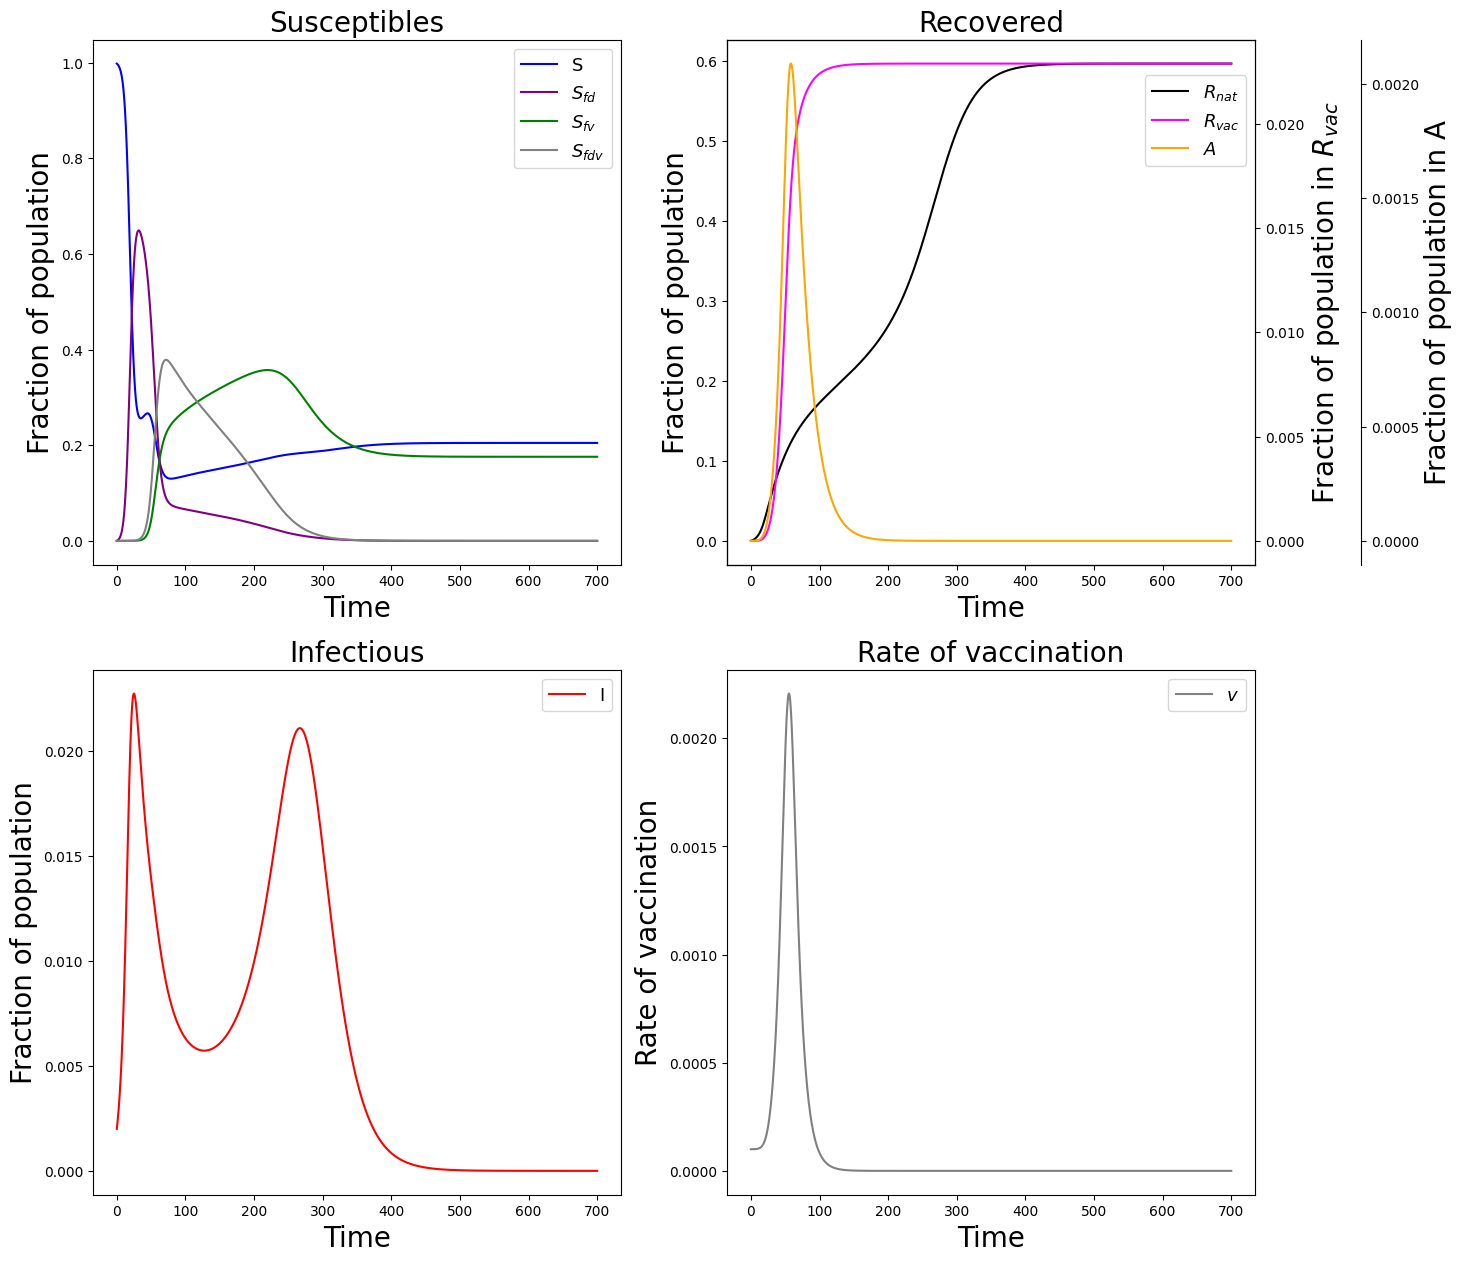

In [ ]:
#Parameters
alpha_f = 0.5 #1.8*beta

beta_fv = 0.3 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))


ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))


axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


## Region E - Light yellow region ($\alpha_f=0.75$, $\beta_{fv}=0.7$)

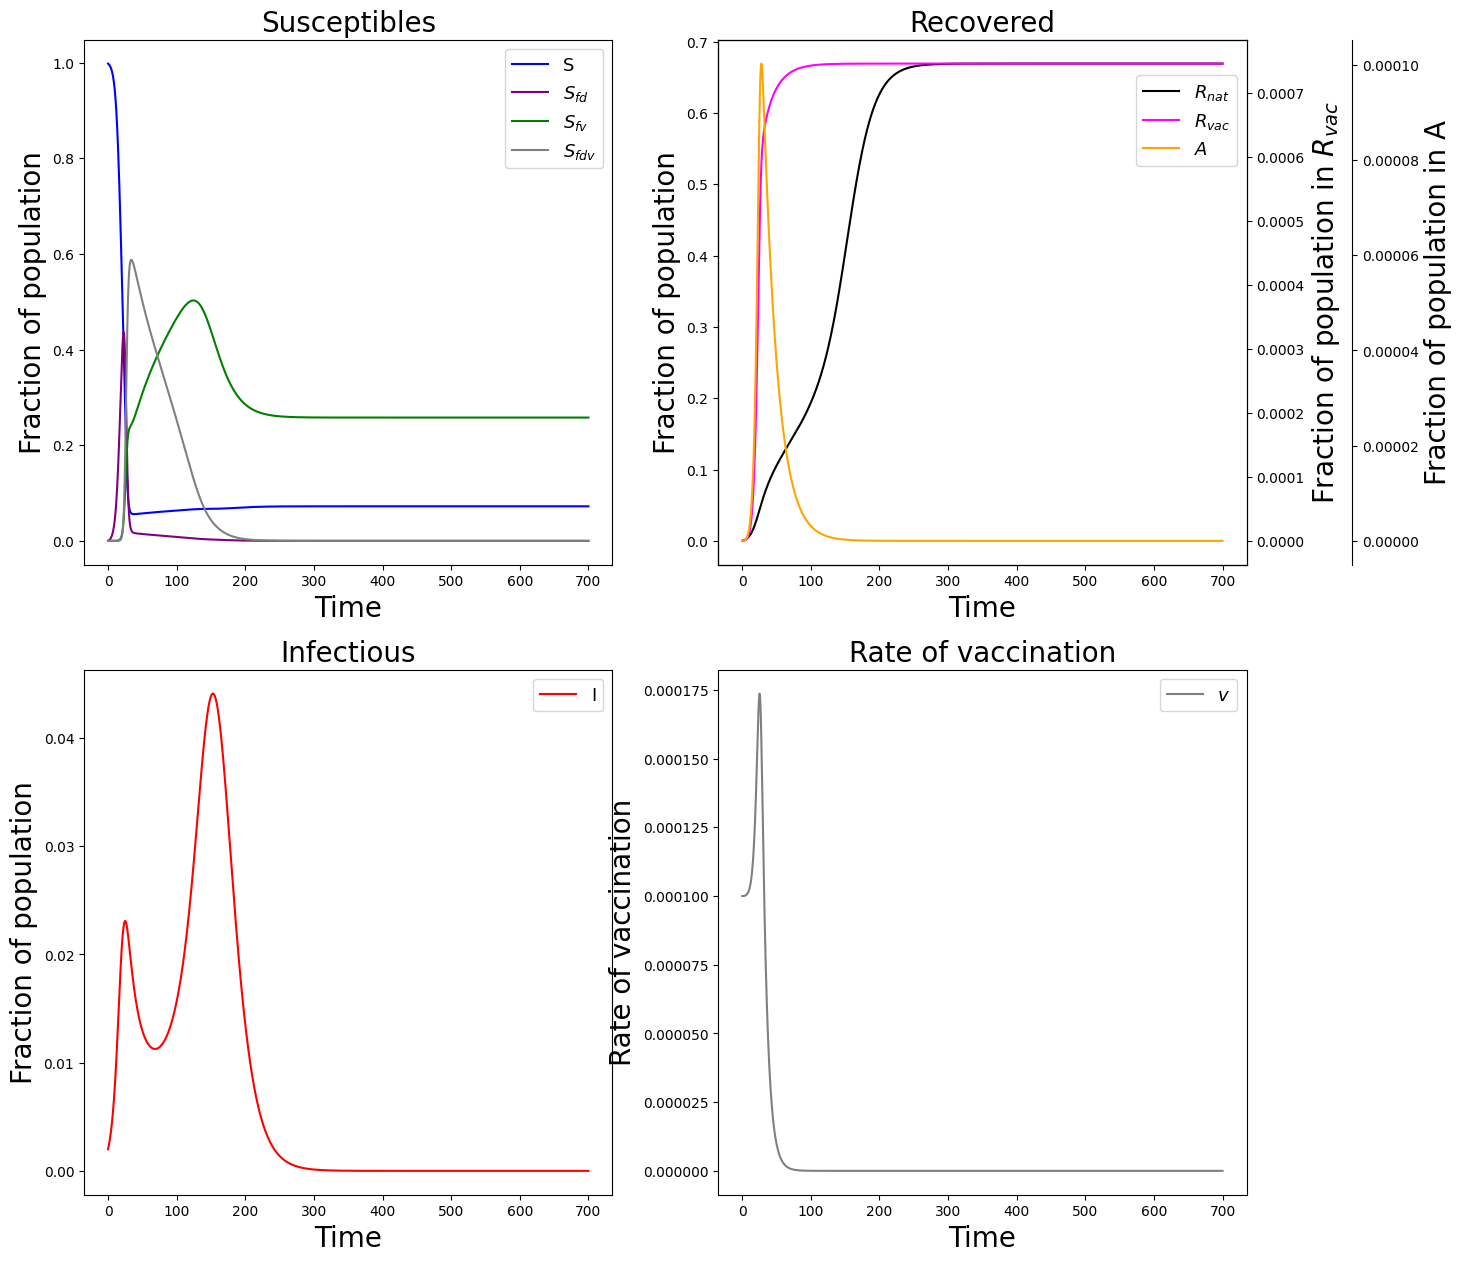

In [ ]:
#Parameters
alpha_f = 0.75 #1.8*beta

beta_fv = 0.7 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))


ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))


axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


## Region F - White region ($\alpha_f=2$, $\beta_{fv}=0.98$)

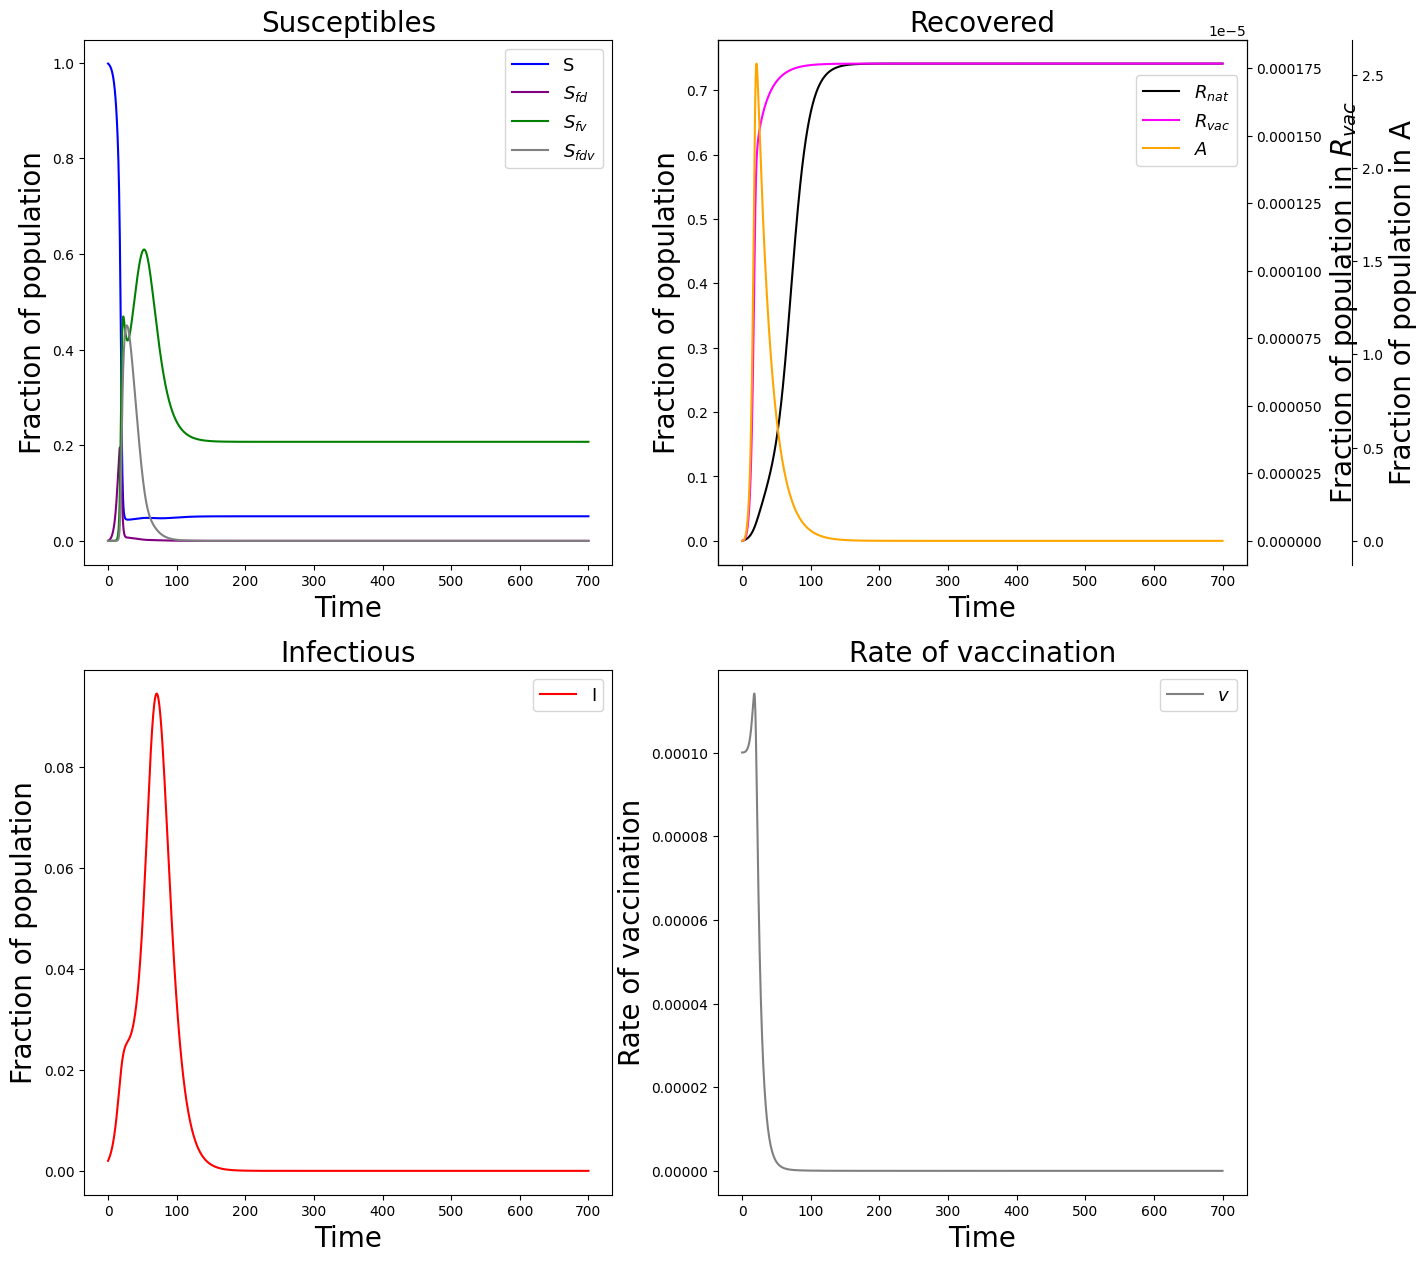

In [ ]:
#Parameters
alpha_f = 2 #1.8*beta

beta_fv = 0.98 #1.6*beta

beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
eta = 0.8
sigma = 0.2 #0.02
epsilon = 0.2
gamma = beta/2 #gamma_2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,700,2000, retstep=True)

def model(Ic,t):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv + s_fdv) + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t #dv/dt #eta*(epsilon-v_t)*(beta_fd*(s_fd + i + a_dis + s_fdv)/(gamma_f + alpha_f*(r_nat + r_vac)) - beta_fv*(s_fv + a_vac + s_fdv)/(gamma_f + alpha_f*r_vac))*v_t #

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel


z = odeint(model, Ic, t)

fig,axis = plt.subplots(2,2,figsize=(15,15))

plt.rc('axes', titlesize=20) # Axes labels font size
plt.rc('legend', fontsize=13) # Legend fontsize
plt.rc('figure', titlesize=20) # Figure title

axis[0,0].plot(t, z[:,0],color='blue',label='S')
axis[0,0].plot(t, z[:,1],color='purple',label='$S_{fd}$')
axis[0,0].plot(t, z[:,2],color='green',label='$S_{fv}$')
axis[0,0].plot(t, z[:,3],color='grey',label='$S_{fdv}$')
axis[0,0].set_xlabel('Time', fontsize='20')
axis[0,0].set_ylabel('Fraction of population', fontsize='20')
axis[0,0].set_title('Susceptibles', fontsize='20')
axis[0,0].legend()

axis[1,0].plot(t, z[:,4],color='red',label='I')
axis[1,0].set_xlabel('Time', fontsize='20')
axis[1,0].set_ylabel('Fraction of population', fontsize='20')
axis[1,0].set_title('Infectious', fontsize='20')
axis[1,0].legend()

ax2 = axis[0,1].twinx()
ax3 = axis[0,1].twinx()

ax3.spines.right.set_position(("axes", 1.2))


ln1 = axis[0,1].plot(t, z[:,5],color='black',label='$R_{nat}$')
axis[0,1].set_xlabel('Time', fontsize='20')
axis[0,1].set_ylabel('Fraction of population', fontsize='20')
axis[0,1].set_title('Recovered', fontsize='20')
#axis[0,1].legend()

ln2 = ax2.plot(t, z[:,6],color='magenta',label='$R_{vac}$')
ax2.set_ylabel('Fraction of population in $R_{vac}$', fontsize='20')
#ax2.legend()

ln3 = ax3.plot(t, z[:,7],color='orange',label='$A$')
ax3.set_ylabel('Fraction of population in A', fontsize='20')
#ax3.legend()

ln = ln1+ln2+ln3
labs = [l.get_label() for l in ln]
axis[0,1].legend(ln, labs, loc='upper right', bbox_to_anchor=(1, 0.95))


axis[1,1].plot(t, z[:,8],color='grey', label='$v$')
axis[1,1].set_xlabel('Time', fontsize='20')
axis[1,1].set_ylabel('Rate of vaccination', fontsize='20')
axis[1,1].set_title('Rate of vaccination', fontsize='20')
axis[1,1].legend()


# Submodels

## No double fear submodel (Triple contagion model)

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta
p = 0.25
sigma = 0.2 #0.02
eta = 0.8
epsilon = 0.2
gamma_f = 0.05
beta_fv_val = np.linspace(0,1,50)
alpha_f_val = np.linspace(0,1,50)

gamma = beta/2

Ic = [0.998,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,5000,6000, retstep=True) #t, dt = np.linspace(0,700,1000, retstep=True)

In [ ]:
def model(Ic,t, beta_fv, alpha_f):
  s, s_fd, s_fv, i, r_nat, r_vac, a, v_t = Ic

  dS = -beta*s*i-beta_fd*(s_fd+i)*s-beta_fv*(s_fv+a)*s+gamma_f*(s_fd+s_fv)+alpha_f*(r_nat*s_fd+r_vac*s_fv) #dS/dt
  dS_fd = -p*beta*i*s_fd-gamma_f*s_fd-alpha_f*r_nat*s_fd+beta_fd*(s_fd+i)*s-v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv-gamma_f*s_fv-alpha_f*r_vac*s_fv+beta_fv*(s_fv+a)*s #dS_fv/dt
  dI = beta*s*i-gamma*i+p*beta*i*s_fd+beta*i*s_fv #dI/dt
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd+gamma_f*a #dR_vac/dt
  dA = sigma*v_t*s_fd-gamma_f*a #dA/dt
  dv = eta*(s_fd-s_fv)*(epsilon-v_t)*v_t #dv/dt

  dmodel = [dS, dS_fd, dS_fv, dI, dR_nat, dR_vac, dA, dv]

  return dmodel

Text(0, 0.5, '$\\beta_{fv}$')

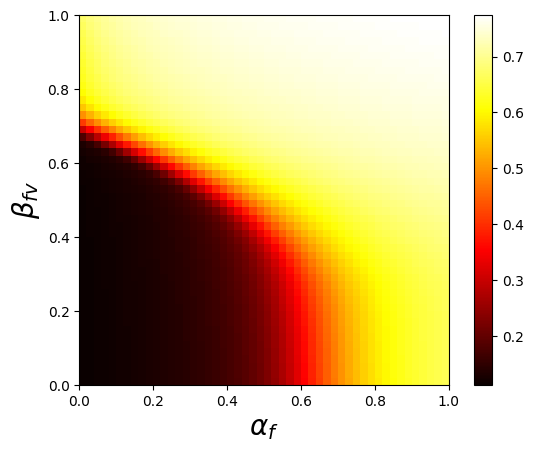

In [ ]:
final_size = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  total_infected_list = []
  for k in range(len(alpha_f_val)):
    alpha_f = alpha_f_val[k]
    z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
    i_input = (beta*z[:,0]+p*beta*z[:,1]+beta*z[:,2])*z[:,3]*dt #Rate at which population enters Infectious compartment
    total_infected = sum(i_input)
    total_infected_list.append(total_infected)
  final_size.append(total_infected_list)

fig, ax = plt.subplots()
im = ax.imshow(final_size, cmap='hot', extent=[0,1,0,1], origin='lower')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
# ax.set_xticks(np.arange(len(p_val)))
# ax.set_yticks(np.arange(len(p_fdv_val)))
# ax.set_xticklabels(['{:.1f}'.format(rate) for rate in p_val])
# ax.set_yticklabels(['{:.1f}'.format(rate) for rate in p_fdv_val])
ax.set_xlabel(r'$\alpha_f$', fontsize='20')
ax.set_ylabel(r'$\beta_{fv}$', fontsize='20')

# data = np.asarray(final_size)
# ax = sb.heatmap(data)
#ax.invert_yaxis()

## No vaccination submodel - v(t)=0, $S_{fv} \neq 0$

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
sigma = 0.2 #0.02
eta = 0.8
epsilon = 0.2

beta_fv_val = np.linspace(0,1,100)
alpha_f_val = np.linspace(0,1,100)

gamma = beta/2

Ic = [0.998,0.0,0.001,0.0,0.001,0.0,0.0,0.0,0.0] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,1000,500, retstep=True) #t, dt = np.linspace(0,700,1000, retstep=True)

In [ ]:
def model(Ic,t,beta_fv,alpha_f):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv) + gamma_f*s_fdv + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt # gamma_f*s_fdv
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt #gamma_f*s_fdv
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt beta*i*s_fv
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt gamma_f*a_vac
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt gamma_f*a_vac
  dv = 0#eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t # 0

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel

Text(0, 0.5, '$\\beta_{fv}$')

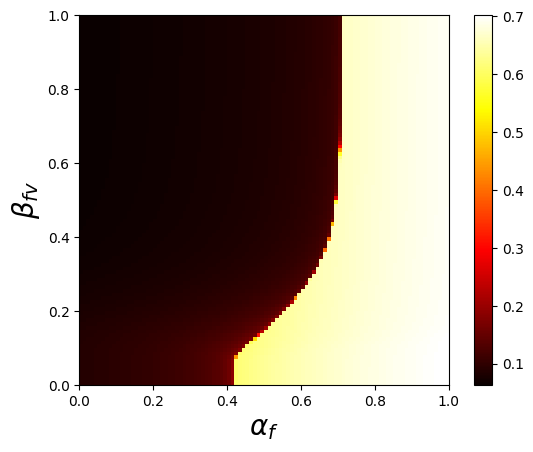

In [ ]:
final_size = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  total_infected_list = []
  for k in range(len(alpha_f_val)):
    alpha_f = alpha_f_val[k]
    z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
    i_input = (beta*z[:,0]+p*beta*z[:,1]+beta*z[:,2]+p_fdv*beta*z[:,3])*z[:,4]*dt #Rate at which population enters Infectious compartment
    total_infected = sum(i_input)
    total_infected_list.append(total_infected)
  final_size.append(total_infected_list)

fig, ax = plt.subplots()
im = ax.imshow(final_size, cmap='hot', extent=[0,1,0,1], origin='lower')

# Add color bar
cbar = ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
# ax.set_xticks(np.arange(len(p_val)))
# ax.set_yticks(np.arange(len(p_fdv_val)))
# ax.set_xticklabels(['{:.1f}'.format(rate) for rate in p_val])
# ax.set_yticklabels(['{:.1f}'.format(rate) for rate in p_fdv_val])
ax.set_xlabel(r'$\alpha_f$', fontsize='20')
ax.set_ylabel(r'$\beta_{fv}$', fontsize='20')

# data = np.asarray(final_size)
# ax = sb.heatmap(data)
#ax.invert_yaxis()

# Temporal plots on same plot

In [ ]:
#Parameters
beta = 2/7
beta_fd = 1.1*beta
gamma_f = 0.05
p = 0.25
p_fdv = 0.15
sigma = 0.2 #0.02
eta = 0.8
epsilon = 0.2

beta_fv_val = np.array([0.3,0.1,0.1,0.3,0.7,0.98])
alpha_f_val = np.array([0.3,0.45,0.59,0.5,0.75,2])

gamma = beta/2

Ic = [0.998,0.0,0.0,0.0,0.002,0.0,0.0,0.0,0.0001] #(S,S_fd,S_fv,S_fdv,I,R_nat,R_vac,A_vac,v)
t, dt = np.linspace(0,500,2000, retstep=True) #t, dt = np.linspace(0,700,1000, retstep=True)

In [ ]:
def model(Ic,t,beta_fv,alpha_f):
  s, s_fd, s_fv, s_fdv, i, r_nat, r_vac, a_vac, v_t = Ic

  dS = -beta*i*s - beta_fd*(s_fd + i + s_fdv)*s - beta_fv*(s_fv + a_vac + s_fdv)*s + gamma_f*(s_fd + s_fv) + gamma_f*s_fdv + alpha_f*(r_nat*s_fd + r_vac*s_fv) #dS/dt # gamma_f*s_fdv
  dS_fd = -p*beta*i*s_fd - gamma_f*s_fd - alpha_f*r_nat*s_fd + beta_fd*(s_fd + i + s_fdv)*s - (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + alpha_f*r_vac*s_fdv - v_t*s_fd #dS_fd/dt
  dS_fv = -beta*i*s_fv - gamma_f*s_fv - alpha_f*r_vac*s_fv + beta_fv*(s_fv + a_vac + s_fdv)*s - beta_fd*(i + s_fd + s_fdv)*s_fv + alpha_f*r_nat*s_fdv#dS_fv/dt
  dS_fdv = -p_fdv*beta*i*s_fdv + (beta_fv*s_fv + beta_fv*a_vac + beta_fv*s_fdv)*s_fd + beta_fd*(i + s_fd + s_fdv)*s_fv - alpha_f*r_vac*s_fdv - alpha_f*r_nat*s_fdv - gamma_f*s_fdv #dS_fdv/dt #gamma_f*s_fdv
  dI = beta*s*i + p*beta*i*s_fd + beta*i*s_fv + p_fdv*beta*i*s_fdv - (gamma)*i #dI/dt beta*i*s_fv
  dR_nat = gamma*i #dR_nat/dt
  dR_vac = v_t*(1-sigma)*s_fd + gamma_f*a_vac #dR_vac/dt gamma_f*a_vac
  dA_vac = sigma*v_t*s_fd - gamma_f*a_vac #dA_vac/dt gamma_f*a_vac
  dv = eta*(s_fd-s_fv-s_fdv)*(epsilon-v_t)*v_t # 0

  dmodel = [dS, dS_fd, dS_fv, dS_fdv, dI, dR_nat, dR_vac, dA_vac, dv]

  return dmodel

## S

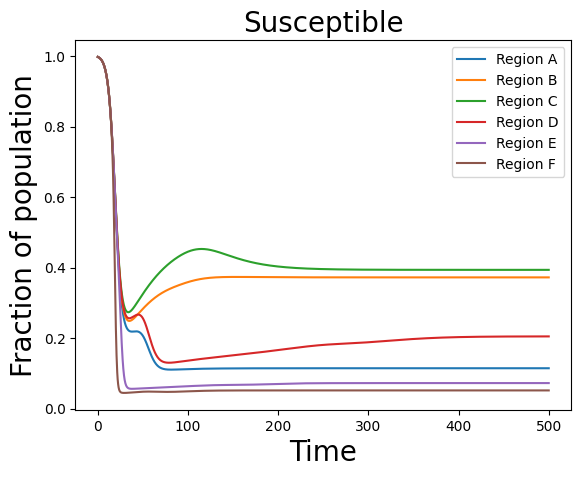

In [ ]:
S_list = []
S_list_str = ['Region A','Region B','Region C','Region D','Region E','Region F']

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  S_list.append(z[:,0])
  plt.plot(t,S_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Susceptible', fontsize='20')
plt.legend()

## $S_{\rm{fd}}$

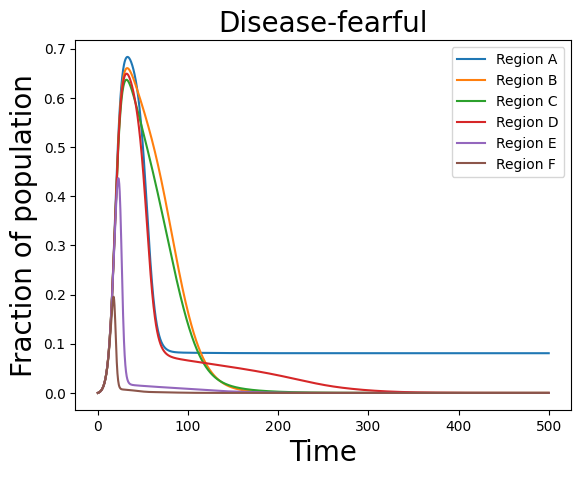

In [ ]:
S_fd_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  S_fd_list.append(z[:,1])
  plt.plot(t,S_fd_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Disease-fearful', fontsize='20')
plt.legend()

## $S_{\rm{fv}}$

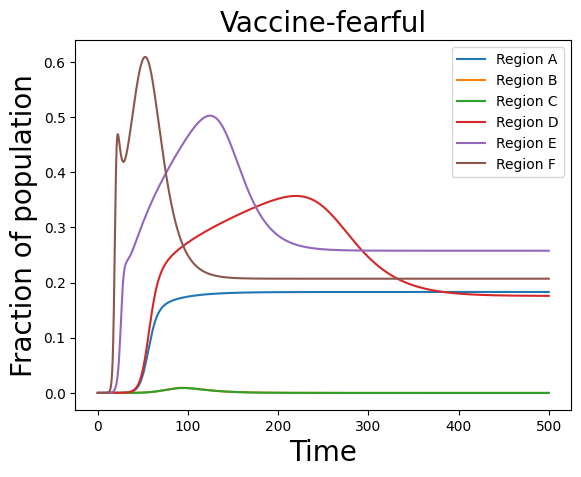

In [ ]:
S_fv_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  S_fv_list.append(z[:,2])
  plt.plot(t,S_fv_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Vaccine-fearful', fontsize='20')
plt.legend()

## $S_{\rm{fdv}}$

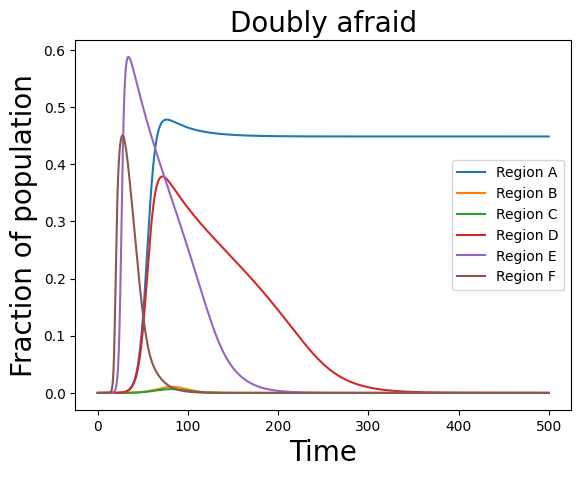

In [ ]:
S_fdv_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  S_fdv_list.append(z[:,3])
  plt.plot(t,S_fdv_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Doubly afraid', fontsize='20')
plt.legend()

## $I$

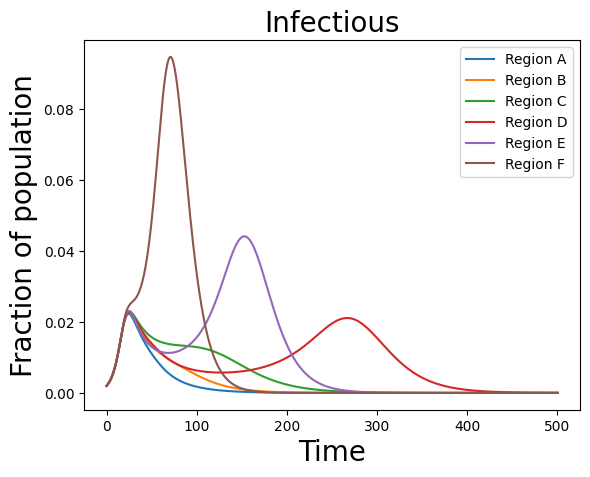

In [ ]:
infected_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  infected_list.append(z[:,4])
  plt.plot(t,infected_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Infectious', fontsize='20')
plt.legend()

## $R_{\rm{nat}}$

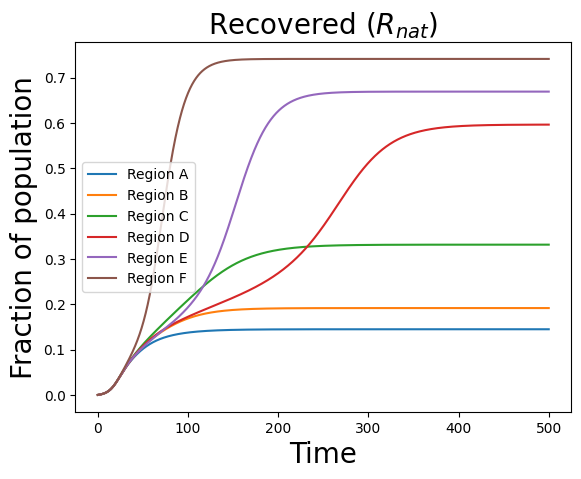

In [ ]:
R_nat_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  R_nat_list.append(z[:,5])
  plt.plot(t,R_nat_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Recovered ($R_{nat})$', fontsize='20')
plt.legend()

## $R_{\rm{vac}}$

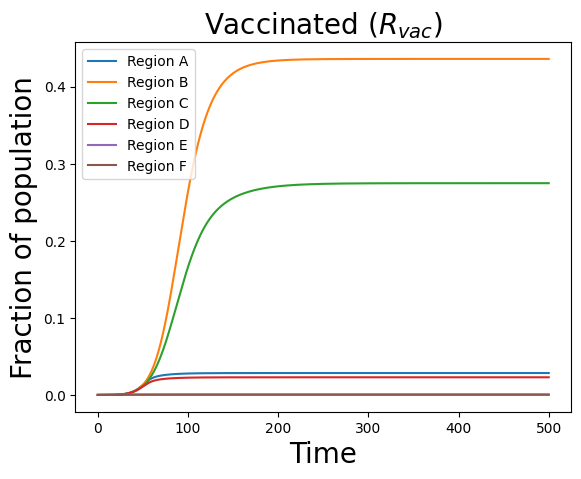

In [ ]:
R_vac_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  R_vac_list.append(z[:,6])
  plt.plot(t,R_vac_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Vaccinated ($R_{vac})$', fontsize='20')
plt.legend()

## $A_{\rm{vac}}$

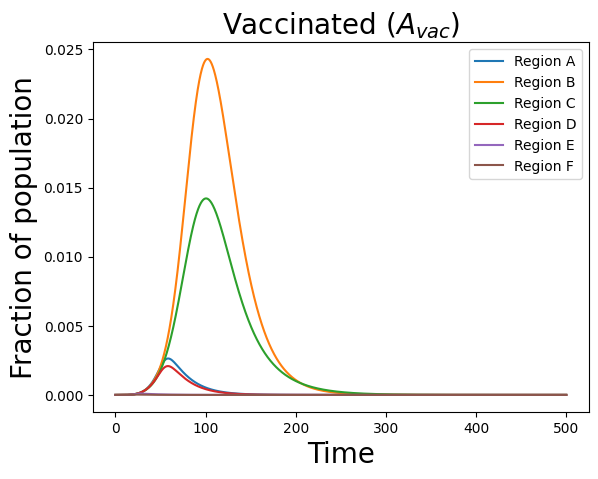

In [ ]:
A_vac_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  A_vac_list.append(z[:,7])
  plt.plot(t,A_vac_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Vaccinated ($A_{vac})$', fontsize='20')
plt.legend()

## $v(t)$

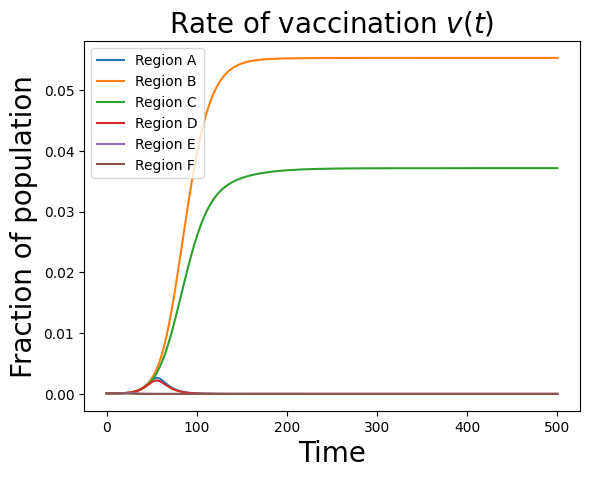

In [ ]:
v_list = []

for l in range(len(beta_fv_val)):
  beta_fv = beta_fv_val[l]
  alpha_f = alpha_f_val[l]
  z = odeint(model, Ic, t, args=(beta_fv,alpha_f,))
  v_list.append(z[:,8])
  plt.plot(t,v_list[l],label=str(S_list_str[l]))


plt.xlabel('Time', fontsize='20')
plt.ylabel('Fraction of population', fontsize='20')
plt.title('Rate of vaccination $v(t)$', fontsize='20')
plt.legend()